<a href="https://colab.research.google.com/github/fay421/Deep_Learning/blob/main/PowerPlant_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Energy Output and Exhaust Vacuum for a Power Plant by using ANN

## About ANN:

## The steps involved in training an Artificial Neural Network (ANN) condensed into 4 main steps:


1.   Data Preparation and Preprocessing:

*   Gather and preprocess your dataset, ensuring it's well-suited for training the neural network. This involves cleaning the data, handling missing values, and encoding categorical variables if necessary.
*   Split the data into training and testing sets to evaluate the performance of the trained model.
2.   Model Definition and Initialization:

*   Design the architecture of your neural network, including the number of layers, the number of neurons in each layer, and the activation functions used in each layer.
*   Initialize the weights and biases of the neural network. This can be done randomly or using specific initialization techniques like Xavier or He initialization.

3.   Training the Model:

*   Feed the training data through the network (forward propagation) to generate predictions.
*   Compare the predictions with the actual target values and compute a loss function that quantifies the difference between them.
*   Use backpropagation to calculate the gradients of the loss function with respect to the model parameters (weights and biases).
*   Update the weights and biases using an optimization algorithm (e.g., stochastic gradient descent) to minimize the loss function. This process iterates over multiple epochs until the model converges to a satisfactory solution.

4.   Model Evaluation and Deployment:

*   Evaluate the trained model using the testing data to assess its performance on unseen examples. Calculate metrics such as accuracy, precision, recall, or mean squared error depending on the nature of the problem.
*   Fine-tune hyperparameters if necessary to improve the model's performance.
*   Once satisfied with the model's performance, deploy it for making predictions on new data. This could involve integrating the model into an application or serving it through an API.








#Sequential Vs Functional API in Keras

* Neural networks are very complex in architecture and computationally expensive.

* Luckily we have Keras, a deep learning API written in Python running on top of Tensorflow, that makes our work of building complex neural networks much easier.

* Keras offers two ways to build neural networks:
  - *Sequential API*: Here we create the model layer-by-layer. It is very simple and easy to use. But sharing of layers or branching of layers is not allowed. Also, you can’t have multiple inputs or outputs.
  - *Functional API*: It is more flexible than the sequential API. It is more powerful than the sequential API in the sense branching or sharing of layers is allowed here. Also it can have multiple inputs and outputs.

## Sequential API:

###Import Liberies

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

## Step 1 :
### Create the Model

In [ ]:
model = Sequential()
model.add(Dense(4,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(1))

## Step 2 :
### Compile the Model

In [ ]:
model.compile(optimizer='adam',loss = 'mse')

## Step 3:
### Train the Model

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          bach_size=128,epoch=400)

## Functional API:
### Import Liberies

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

## Step 1 :
### Create the Model

In [ ]:
input_layer=Input(shape=(3,))
Layer_1 = Dense(4,activation='relu')(input_layer)
Layer_2 = Dense(4,activation='relu')(Layer_1)
output_layer = Dense(1, activation='linear')(Layer_2)
model = Model(inputs=input_layer,outputs=input_layer)

## Step 2:
### Compile the Model

In [ ]:
model.compile(optimizer= 'adam',loss= 'mse')

## Step 3 :
### Train the Model

In [ ]:
model.fit(X_train,y_train,epoch = 400,bach_size= 128, validation_data=(X_test,y_test))

## About Dataset:  Power Plant

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load. A combined-cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has an effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.

Features consist of hourly average ambient variables


*   Temperature (T) in the range 1.81°C and 37.11°C.
*   Ambient Pressure (AP) in the range 992.89-1033.30 millibar.
*   Relative Humidity (RH) in the range 25.56% to 100.16%.
*   Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg.
*   Net hourly electrical energy output (PE) 420.26-495.76 MW.

Let’s build a neural network using functional API to predict Net hourly electrical energy output (PE) and Exhaust Vacuum (V) with Temperature (T), Ambient Pressure (AP) and Relative Humidity (RH) as inputs.

## Get Dataset:
https://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip

In [2]:
!wget https://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip

--2024-02-26 01:55:33--  https://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘combined+cycle+power+plant.zip’

combined+cycle+powe     [    <=>             ]   3.50M  3.03MB/s    in 1.2s    

2024-02-26 01:55:35 (3.03 MB/s) - ‘combined+cycle+power+plant.zip’ saved [3674852]



In [3]:
!unzip combined+cycle+power+plant.zip

Archive:  combined+cycle+power+plant.zip
   creating: CCPP/
  inflating: CCPP/Folds5x2_pp.ods    
  inflating: CCPP/Folds5x2_pp.xlsx   
  inflating: CCPP/Readme.txt         
  inflating: CCPP/Readme.txt~        


## Import Libraries:

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Create a DataFrame

In [5]:
df = pd.read_excel('/content/CCPP/Folds5x2_pp.xlsx')

In [6]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
df.shape

(9568, 5)

## Define 2 outputs ('V' and 'PE') for the Model

In [8]:
def get_outputs(data):
  y1 = data.pop('PE')
  y1 = np.array(y1)
  y2 = data.pop('V')
  y2 = np.array(y2)
  return y1, y2

## Split the Model to train and test

In [9]:
train, test =train_test_split(df, test_size=0.2, random_state = 42)

In [10]:
y_train = get_outputs(train)
y_test = get_outputs(test)

## Scale the data

In [11]:
min_max =MinMaxScaler()

In [12]:
X_train = min_max.fit_transform(train)
X_test = min_max.transform(test)

## Import Libraries for NN

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

## Define input layer

In [14]:
input_layer=Input(shape=(3,), name = 'input_layer')

## Define hidden layer

In [15]:
Layer_1 = Dense(10,activation='relu',name = 'Layer_1')(input_layer)
Layer_2 = Dense(10,activation='relu',name = 'Layer_2')(Layer_1)

## Define output layer 1

In [16]:
y1_output = Dense(1,activation='linear',name='y1_output')(Layer_2)

## Define branched layer

In [17]:
Branched_layer = Dense(10,activation='relu',name='Branched_layer')(Layer_2)

## Define output layer 2

In [18]:
y2_output = Dense(1,activation='linear',name='y2_output')(Branched_layer)

## Define the Model and it's layers (inputs & outputs)

In [19]:
model = Model(inputs=input_layer,outputs=[y1_output,y2_output])

## Get the Summary of Model

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 3)]                  0         []                            
                                                                                                  
 Layer_1 (Dense)             (None, 10)                   40        ['input_layer[0][0]']         
                                                                                                  
 Layer_2 (Dense)             (None, 10)                   110       ['Layer_1[0][0]']             
                                                                                                  
 Branched_layer (Dense)      (None, 10)                   110       ['Layer_2[0][0]']             
                                                                                              

## Compile Model

In [21]:
model.compile(optimizer = 'adam',loss = {'y1_output':'mse','y2_output':'mse'})

## Train Model

In [25]:
history=model.fit(X_train,y_train,batch_size=128,epochs=300,verbose=True,validation_data=(X_test,y_test))

Epoch 1/300
60/60 [==============================] - 0s 6ms/step - loss: 600.4072 - y1_output_loss: 418.3454 - y2_output_loss: 182.0617 - val_loss: 582.2040 - val_y1_output_loss: 401.2593 - val_y2_output_loss: 180.9447
Epoch 2/300
60/60 [==============================] - 0s 6ms/step - loss: 583.9985 - y1_output_loss: 401.2866 - y2_output_loss: 182.7119 - val_loss: 567.5097 - val_y1_output_loss: 386.3900 - val_y2_output_loss: 181.1197
Epoch 3/300
60/60 [==============================] - 0s 6ms/step - loss: 567.5050 - y1_output_loss: 384.6624 - y2_output_loss: 182.8427 - val_loss: 549.8395 - val_y1_output_loss: 367.7841 - val_y2_output_loss: 182.0555
Epoch 4/300
60/60 [==============================] - 0s 6ms/step - loss: 550.6822 - y1_output_loss: 367.6697 - y2_output_loss: 183.0125 - val_loss: 533.3616 - val_y1_output_loss: 351.5123 - val_y2_output_loss: 181.8492
Epoch 5/300
60/60 [==============================] - 1s 8ms/step - loss: 534.3051 - y1_output_loss: 351.1736 - y2_output_los

## Predict of Model

In [26]:
predictions = model.predict(X_test)
predicted_energy = predictions[0]
predicted_vacuum = predictions[1]

60/60 [==============================] - 0s 2ms/step


## Visualization

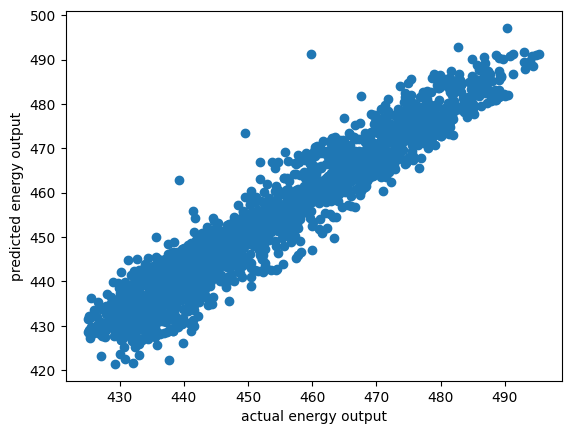

In [28]:
plt.scatter(y_test[0], predicted_energy)
plt.xlabel('actual energy output')
plt.ylabel('predicted energy output')
plt.show()

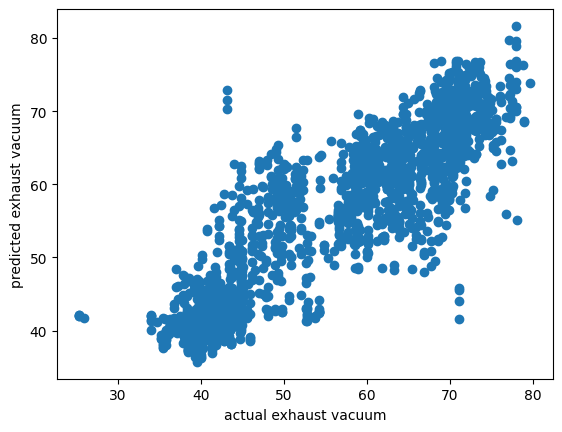

In [29]:
plt.scatter(y_test[1], predicted_vacuum)
plt.xlabel('actual exhaust vacuum')
plt.ylabel('predicted exhaust vacuum')
plt.show()

## Evaluation

In [30]:
print('r2 score for energy predicted :', r2_score(y_test[0], predicted_energy))
print('r2 score forexhaust vacuum predicted :', r2_score(y_test[1], predicted_vacuum))

r2 score for energy predicted : 0.9213861406308309
r2 score forexhaust vacuum predicted : 0.7871383703383564
